In [164]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
files = glob.glob('../data/raw/archive/*.csv')
datasets = {f.split('/')[-1][:-4].replace('olist_', '').replace('_dataset', ''): pd.read_csv(f) for f in files}
print(datasets.keys())

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])


In [95]:
for d_str in datasets.keys():
    print(d_str)
    d = datasets[d_str]
    print(d.columns)
    print()

sellers
Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

product_category_name_translation
Index(['product_category_name', 'product_category_name_english'], dtype='object')

orders
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

order_items
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

customers
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

geolocation
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

order_payments
Index(['order_id', 'payment_sequential', 'payment_type',
   

In [30]:
print(datasets['customers']['customer_id'].nunique())
print(datasets['customers']['customer_unique_id'].nunique())
print(datasets['customers'].shape)
print(datasets['orders']['customer_id'].nunique())
print(datasets['orders'].shape)

99441
96096
(99441, 5)
99441
(99441, 8)


In [38]:
# Relate customers to their orders
customers_orders = pd.merge(datasets['orders'], datasets['customers'], 
                            left_on=['customer_id'], right_on=['customer_id'], how='inner')
customers_orders.sort_values(['customer_unique_id'])
num_orders = {}
for customer in customers_orders['customer_unique_id'].unique():
    orders = customers_orders.loc[customers_orders['customer_unique_id'] == customer]
    if orders.shape[0] not in num_orders:
        num_orders[orders.shape[0]] = orders.shape[0]
    else:
        num_orders[orders.shape[0]] += orders.shape[0]

In [89]:
# Relate customers + orders to order reviews
customers_reviews = pd.merge(customers_orders, datasets['order_reviews'], 
                            left_on=['order_id'], right_on=['order_id'], how='inner')
customers_reviews.sort_values(['customer_unique_id'])
print(customers_reviews.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


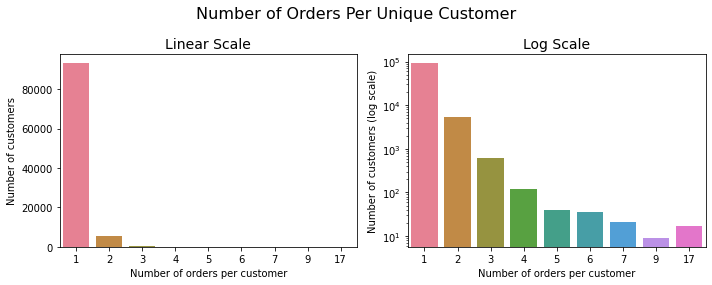

In [82]:
colors = sns.color_palette('husl', 9)
nums = list(sorted(num_orders.keys()))
vals = [num_orders[v] for v in nums]

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
g = sns.barplot(x=nums, y=vals, palette=colors, ax=ax[0])
g_log = sns.barplot(x=nums, y=vals, palette=colors, ax=ax[1])
g_log.set_yscale("log")

g.set_xlabel('Number of orders per customer')
g.set_ylabel('Number of customers')
g.set_title('Linear Scale', fontsize=14)
g_log.set_xlabel('Number of orders per customer')
g_log.set_ylabel('Number of customers (log scale)')
g_log.set_title('Log Scale', fontsize=14)
plt.suptitle('Number of Orders Per Unique Customer', fontsize=16)
plt.tight_layout()

In [90]:
# What would be the dimension of a one-hot encoding for various features?
print('Number of unique values per feature:')
for feature in datasets['customers'].columns:
    print('\t{}: {}'.format(feature, datasets['customers'][feature].nunique()))
    
for feature in datasets['geolocation'].columns:
    print('\t{}: {}'.format(feature, datasets['geolocation'][feature].nunique()))   

Number of unique values per feature:
	customer_id: 99441
	customer_unique_id: 96096
	customer_zip_code_prefix: 14994
	customer_city: 4119
	customer_state: 27
	geolocation_zip_code_prefix: 19015
	geolocation_lat: 717360
	geolocation_lng: 717613
	geolocation_city: 8011
	geolocation_state: 27


In [113]:
num_zips = {}
for customer in customers['customer_unique_id'].unique():
    df = customers.loc[customers['customer_unique_id'] == customer]
    zipcode = df.iloc[0]['customer_zip_code_prefix']
    if zipcode not in num_zips.keys():
        num_zips[zipcode] = 1
    else:
        num_zips[zipcode] += 1

{14409: 17,
 9790: 19,
 1151: 9,
 8775: 13,
 13056: 42,
 89254: 9,
 4534: 19,
 35182: 10,
 81560: 14,
 30575: 49,
 39400: 69,
 20231: 23,
 18682: 9,
 5704: 3,
 95110: 11,
 13412: 21,
 22750: 48,
 7124: 27,
 5416: 17,
 68485: 6,
 88034: 38,
 74914: 2,
 5713: 15,
 82820: 21,
 8225: 18,
 9121: 18,
 74310: 10,
 4571: 32,
 29311: 3,
 5528: 14,
 12235: 27,
 18130: 19,
 42800: 10,
 27525: 22,
 81750: 16,
 13175: 30,
 7170: 25,
 93415: 4,
 65075: 32,
 88104: 10,
 7176: 22,
 35960: 23,
 5727: 19,
 7053: 5,
 14026: 12,
 30320: 52,
 38300: 24,
 18740: 16,
 83085: 10,
 5351: 19,
 39406: 4,
 14860: 17,
 21310: 17,
 23970: 31,
 79804: 2,
 5017: 30,
 75388: 9,
 85808: 1,
 60140: 6,
 72270: 7,
 2075: 8,
 96015: 24,
 90010: 53,
 22440: 25,
 13323: 19,
 30190: 52,
 13212: 92,
 29307: 9,
 12280: 16,
 60336: 4,
 11310: 30,
 38408: 67,
 37720: 8,
 24431: 19,
 5890: 10,
 3733: 10,
 83709: 10,
 11347: 7,
 26272: 3,
 5415: 21,
 59655: 3,
 4548: 14,
 28010: 14,
 13573: 3,
 2175: 1,
 37500: 34,
 90670: 19,
 989

In [156]:
# Relate customer orders, reviews, and product info

customers_reviews_products = pd.merge(customers_reviews, datasets['order_items'], 
                            left_on=['order_id'], right_on=['order_id'], how='inner')
customers_reviews_products = pd.merge(customers_reviews_products, datasets['products'], 
                            left_on=['product_id'], right_on=['product_id'], how='inner')

customers_reviews_products.sort_values(['customer_unique_id']).dropna()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
54624,e22acc9c116caa3f2b7121bbb380d08e,fadbb3709178fc513abc1b2670aa1ad2,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,2018-05-16 20:48:37,2018-05-21 00:00:00,0000366f3b9a7992bf8c76cfdf3221e2,7787,...,129.90,12.00,cama_mesa_banho,60.0,236.0,1.0,1500.0,34.0,7.0,32.0
84458,17e604bb550e265b46ebefe61430751b,30e8a49cee668a4435b2f91cc77c9d15,delivered,2018-08-21 11:34:26,2018-08-21 11:50:53,2018-08-22 12:43:00,2018-08-27 13:11:40,2018-09-05 00:00:00,000ec5bff359e1c0ad76a81a45cb598f,18160,...,14.96,12.79,eletrodomesticos,55.0,251.0,1.0,50.0,17.0,7.0,13.0
61443,bb874c45df1a3c97842d52f31efee99a,1afe8a9c67eec3516c09a8bdcc539090,delivered,2018-07-28 00:23:49,2018-07-28 00:35:19,2018-07-31 15:57:00,2018-08-07 19:28:41,2018-08-22 00:00:00,00172711b30d52eea8b313a7f2cced02,45200,...,74.50,47.57,papelaria,57.0,921.0,5.0,6250.0,25.0,50.0,25.0
86724,aa14b8f4567fef1be1a8912ca010f1c7,cec800e76b1cc898de17926aa9e1e146,delivered,2018-08-24 21:17:00,2018-08-24 21:30:16,2018-08-27 12:43:00,2018-08-30 21:32:40,2018-09-10 00:00:00,001928b561575b2821c92254a2327d06,4757,...,109.90,25.38,moveis_sala,51.0,598.0,2.0,1350.0,44.0,14.0,34.0
86725,aa14b8f4567fef1be1a8912ca010f1c7,cec800e76b1cc898de17926aa9e1e146,delivered,2018-08-24 21:17:00,2018-08-24 21:30:16,2018-08-27 12:43:00,2018-08-30 21:32:40,2018-09-10 00:00:00,001928b561575b2821c92254a2327d06,4757,...,26.99,2.54,cama_mesa_banho,56.0,381.0,1.0,300.0,16.0,10.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19188,cab5ff5f1347330a7576a8aa80bd1774,1a5dca881b4fc9ed776930b3dc9ccfe0,delivered,2018-06-27 11:57:41,2018-06-27 12:10:12,2018-06-27 11:10:00,2018-07-02 15:03:45,2018-07-18 00:00:00,ffeb904468642a1ce663a322629801cb,32146,...,77.50,15.61,malas_acessorios,45.0,702.0,1.0,1300.0,33.0,10.0,49.0
109953,7113e8344293a6a03453110d67c7f533,8b7ab6f3bd953bf7839099fffdbfb086,delivered,2018-04-25 12:08:11,2018-04-26 03:55:18,2018-04-26 15:00:00,2018-05-03 16:07:29,2018-05-18 00:00:00,ffecceca389973ef16660d58696f281e,15385,...,59.90,12.86,fashion_underwear_e_moda_praia,52.0,624.0,1.0,200.0,42.0,4.0,14.0
56112,9a22906fa846451c54fca825591c0577,731ab8b73356171649cb8ed97ee1c99f,delivered,2018-04-20 11:03:47,2018-04-20 11:15:16,2018-05-07 14:43:00,2018-05-11 12:08:54,2018-06-01 00:00:00,fff2ae16b99c6f3c785f0e052f2a9cfb,23017,...,129.94,70.96,moveis_escritorio,33.0,1190.0,1.0,13867.0,101.0,8.0,57.0
93075,3eeeed9128175465db94d6c2406b5b39,05af51fbd839dd9f05c0e07f16e971d4,delivered,2018-07-20 13:47:30,2018-07-20 14:10:23,2018-07-20 14:48:00,2018-07-30 17:19:42,2018-08-08 00:00:00,fff3e1d7bc75f11dc7670619b2e61840,64006,...,54.85,27.66,informatica_acessorios,58.0,223.0,1.0,100.0,40.0,2.0,24.0


In [144]:
# Translate product categories to english
product_categories = datasets['products']['product_category_name'].dropna().unique()
product_translations = datasets['product_category_name_translation']
products_to_english = {}

for i in range(len(product_categories)):
    p = product_categories[i]
    try:
        e = product_translations.loc[product_translations['product_category_name'] == p].iloc[0]['product_category_name_english']
        products_to_english[p] = e
    except:
        products_to_english[p] = p

In [ ]:
# Create customer features

cols = ['customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'number_orders']
for p in product_categories:
    cols.append('number_{}'.format(products_to_english[p]))
for p in product_categories:
    cols.append('rating_{}'.format(products_to_english[p]))

unique_customers = customers['customer_unique_id'].unique()

customer_df = pd.DataFrame(columns=cols, index=range(len(unique_customers)))
customer_df['customer_unique_id'] = unique_customers

for p in product_categories:
    customer_df['number_{}'.format(products_to_english[p])] = 0
    customer_df['rating_{}'.format(products_to_english[p])] = 0

for index, row in customer_df.iterrows():
    customer = row['customer_unique_id']
    df = customers_reviews_products.loc[customers_reviews_products['customer_unique_id'] == customer]
    if df.empty:
        continue
        
    row['number_orders'] = df['order_id'].nunique()
    row['customer_city'] = df['customer_city'].iloc[0]
    row['customer_state'] = df['customer_state'].iloc[0]
    row['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].iloc[0]
    
    for index2, row2 in df.iterrows():
        p = row2['product_category_name']
        
        try:
            row['number_{}'.format(products_to_english[p])] += 1
            row['rating_{}'.format(products_to_english[p])] += int(row2['review_score'])
        except:
            pass
        
    for p in product_categories:
        try:
            row['rating_{}'.format(products_to_english[p])] /= row['number_{}'.format(products_to_english[p])]
        except:
            pass
        
    customer_df.iloc[index] = row

In [178]:
customer_df

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,number_orders,number_perfumery,number_art,number_sports_leisure,number_baby,number_housewares,...,rating_pc_gamer,rating_furniture_bedroom,rating_cine_photo,rating_diapers_and_hygiene,rating_flowers,rating_home_comfort_2,rating_portateis_cozinha_e_preparadores_de_alimentos,rating_security_and_services,rating_furniture_mattress_and_upholstery,rating_cds_dvds_musicals
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,1a29b476fee25c95fbafc67c5ac95cf8,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96092,d52a67c98be1cf6a5c84435bd38d095d,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96093,e9f50caf99f032f0bf3c55141f019d99,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96094,73c2643a0a458b49f58cea58833b192e,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
